<a href="https://colab.research.google.com/github/FrankHolzkamp/fep/blob/main/user_guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/stephenfmann/fep.git


Cloning into 'fep'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 120 (delta 60), reused 85 (delta 28), pack-reused 0
Receiving objects: 100% (120/120), 895.83 KiB | 14.22 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [2]:
import sys

In [3]:
!echo $PYTHONPATH

/env/python


In [4]:
sys.path.insert(0, '/content/fep')

In [5]:
import numpy as np
from scipy import stats,integrate
import matplotlib.pyplot as plt
from datetime import datetime
import logging # error reporting

import calc as cl

[[0.4 0.2]
 [0.1 0.3]]
[[0.4 0.1]
 [0.2 0.3]]
[0.6 0.4]
[[0.66666667 0.33333333]
 [0.25       0.75      ]]


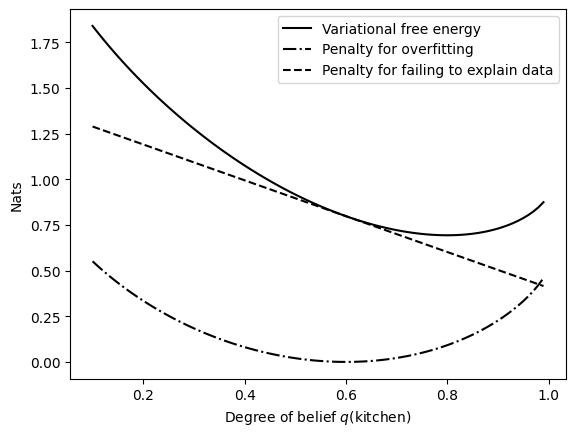

In [13]:

q_range = np.arange(0.1,1.,0.01) # q1 ranges from 0.1 to 0.9 at 0.01 increments

    ## 2. Choose a generative model p(w,x)
    ##  joint probability of w1 and x1: 0.4
    ##  joint probability of w1 and x2: 0.2
    ##  joint probability of w2 and x1: 0.1
    ##  joint probability of w2 and x2: 0.3
    ##  the implied marginal distributions are p(w) = (0.6,0.4) and p(x) = (0.5,0.5)
p = np.array([[0.4,0.2],[0.1,0.3]])

    ## 3. Initialise
F_0_series = [] # values of F when x=0

    ## SFM 2021-06-07: plot overfitting penalty (KLD) and explaining penalty
p_w = p.sum(axis=1)
print(p)
print(p.T)
print(p_w)
print(p_x_w)
p_x_w = p.T/p_w
p_x_w = p_x_w.T
D_0_series = []
E_0_series = []

F_check_series = [] # confirm F = D+E

    ## Calculate free energy for various estimates q
for q0 in q_range:
        ## Create the estimated distribution across world states
    q = np.array([q0,1-q0])
 ##   print(q)

    F_0 = cl.vfe_discrete(p,q,0) # free energy when x=0; default units are nats

    F_0_series.append(F_0)

    D_0_series.append(stats.entropy(q,p_w))

        ## Penalty-for-explaining sum
    e_sum = 0
    i=0
    for q_value in q:
        e_sum+=q_value*np.log(1/p_x_w[i,0]) # 0th value of x, ith value of w
        i+=1
    E_0_series.append(e_sum)

    F_check_series.append(stats.entropy(q,p_w)+e_sum)

    ## 5. Plot

    ## 5a. Data and data labels
fig = plt.figure()

ax = plt.axes()
ax.plot(q_range,F_0_series,color='k',linestyle='-',label="Variational free energy")

    ## SFM 2021-06-07: penalties
ax.plot(q_range,D_0_series,color='k',linestyle='-.',label="Penalty for overfitting")
ax.plot(q_range,E_0_series,color='k',linestyle='--',label="Penalty for failing to explain data")
## ax.plot(q_range,F_check_series,label="VFE check")

ax.legend()

    ## 5b. Axis labels
plt.xlabel('Degree of belief $q($kitchen$)$')
plt.ylabel('Nats')

    ## 5c. Display plot
plt.show()